### chương trình Python sử dụng PyTorch trong Jupyter Notebook để huấn luyện mô hình dự đoán giá nhà dựa trên các tiêu chí như:

Diện tích (sqft)
Số phòng ngủ
Số phòng tắm
Vị trí (điểm số khu vực: 1-10)


File giadat.csv đã được tạo thành công!
Epoch 0, Loss: 110833205248.0
Epoch 50, Loss: 2173930496.0
Epoch 100, Loss: 2173900288.0
Epoch 150, Loss: 2173871616.0
Epoch 200, Loss: 2173841152.0
Epoch 250, Loss: 2173812736.0
Epoch 300, Loss: 2173781760.0
Epoch 350, Loss: 2173751808.0
Epoch 400, Loss: 2173722112.0
Epoch 450, Loss: 2173691648.0
Dự đoán giá nhà: [[367079.03]
 [275308.44]]


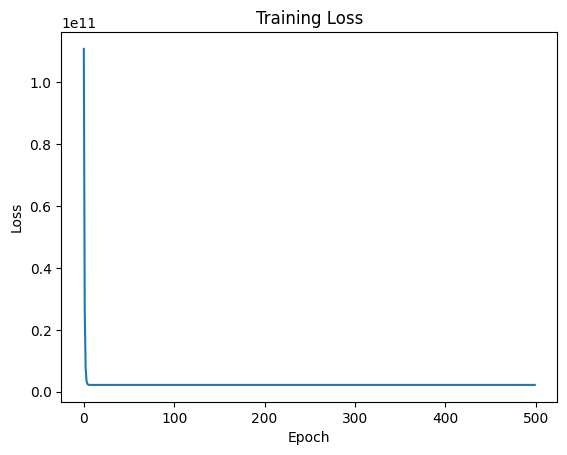

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dữ liệu mẫu: [Diện tích (sqft), Số phòng ngủ, Số phòng tắm, Điểm số khu vực], Giá nhà ($)
data = np.array([
    [1400, 3, 2, 7, 300000],
    [1600, 4, 3, 8, 350000],
    [1700, 3, 2, 9, 400000],
    [1875, 3, 2, 6, 280000],
    [1100, 2, 1, 5, 200000],
    [1550, 3, 2, 7, 310000],
    [1230, 2, 2, 6, 230000],
    [2220, 4, 3, 9, 500000]
], dtype=np.float32)
# Chuyển đổi thành DataFrame
df = pd.DataFrame(data)

# Lưu vào file CSV
df.to_csv("giadat.csv", index=False, encoding="utf-8")

print("File giadat.csv đã được tạo thành công!")
# Chia dữ liệu đầu vào (X) và nhãn (y)
X = torch.tensor(data[:, :-1], dtype=torch.float32)  # 4 đầu vào
y = torch.tensor(data[:, -1:], dtype=torch.float32)  # Giá nhà (1 đầu ra)

# Định nghĩa mô hình mạng nơ-ron
class HousePriceModel(nn.Module):
    def __init__(self):
        super(HousePriceModel, self).__init__()
        self.linear = nn.Linear(4, 1)  # 4 đầu vào (sqft, bedrooms, bathrooms, location), 1 đầu ra (giá nhà)

    def forward(self, x):
        return self.linear(x)

# Khởi tạo mô hình
model = HousePriceModel()
criterion = nn.MSELoss()  # Hàm mất mát Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.0000001)  # Hệ số học nhỏ để tránh vượt quá giá trị thực tế

# Huấn luyện mô hình
losses = []
for epoch in range(500):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Dự đoán giá nhà thử nghiệm
test_data = torch.tensor([[1800, 3, 2, 8], [1350, 2, 1, 6]], dtype=torch.float32)
predicted_prices = model(test_data).detach().numpy()
print(f"Dự đoán giá nhà: {predicted_prices}")

# Vẽ đồ thị loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
